In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [16]:
# Create a set of random latitude and longitude combinations.
lats =  np.random.uniform(low=-90.000, high= 90.000,size=1500)
lngs = np.random.uniform(low=-180.000, high= 180.000,size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs


In [17]:
coordinates=list(lat_lngs)

In [18]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and logitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [19]:
# Import the datetime module from the datetime library
from datetime import datetime

In [26]:
# Import the requests library
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
        

In [32]:
# Create and empty list to hold the weather data.
city_data=[]
# Print the beginning of the logging.
print("Beginning Data Retrieval      ")
print("------------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval      
------------------------------


In [33]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count += 1
    # Create endpoint url with each city.
    city_url=url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record{record_count} of Set {set_count} | {city}")
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record1 of Set 1 | dikson
Processing Record2 of Set 1 | fort frances
Processing Record3 of Set 1 | olenino
Processing Record4 of Set 1 | atuona
Processing Record5 of Set 1 | itarema
Processing Record6 of Set 1 | lumby
Processing Record7 of Set 1 | ushuaia
Processing Record8 of Set 1 | tautira
Processing Record9 of Set 1 | sitka
Processing Record10 of Set 1 | butaritari
Processing Record11 of Set 1 | hermanus
Processing Record12 of Set 1 | bonthe
Processing Record13 of Set 1 | carauari
Processing Record14 of Set 1 | lanzhou
Processing Record15 of Set 1 | beringovskiy
Processing Record16 of Set 1 | guna
Processing Record17 of Set 1 | caravelas
Processing Record18 of Set 1 | gornyy
Processing Record19 of Set 1 | bluff
Processing Record20 of Set 1 | puerto ayora
Processing Record21 of Set 1 | richards bay
Processing Record22 of Set 1 | lulea
Processing Record23 of Set 1 | constitucion
Processing Record24 of Set 1 | port alfred
Processing Record25 of Set 1 | karakol
Processing Re

Processing Record197 of Set 4 | nanortalik
Processing Record198 of Set 4 | samusu
City not found. Skipping...
Processing Record199 of Set 4 | nador
Processing Record200 of Set 4 | mount gambier
Processing Record201 of Set 4 | balabac
Processing Record202 of Set 4 | nelson bay
Processing Record203 of Set 4 | talcahuano
Processing Record205 of Set 5 | hambantota
Processing Record206 of Set 5 | port hardy
Processing Record207 of Set 5 | tiksi
Processing Record208 of Set 5 | kasongo-lunda
Processing Record209 of Set 5 | kodiak
Processing Record210 of Set 5 | mitu
Processing Record211 of Set 5 | ikongo
Processing Record212 of Set 5 | berlevag
Processing Record213 of Set 5 | aku
Processing Record214 of Set 5 | hami
Processing Record215 of Set 5 | terney
Processing Record216 of Set 5 | dom pedrito
Processing Record217 of Set 5 | salinas
Processing Record218 of Set 5 | guerrero negro
Processing Record219 of Set 5 | altay
Processing Record220 of Set 5 | mys shmidta
City not found. Skipping...
P

Processing Record392 of Set 8 | bambous virieux
Processing Record393 of Set 8 | gisborne
Processing Record394 of Set 8 | funtua
Processing Record395 of Set 8 | algiers
Processing Record396 of Set 8 | buala
Processing Record397 of Set 8 | fairlie
Processing Record398 of Set 8 | muravlenko
Processing Record399 of Set 8 | puerto ayacucho
Processing Record400 of Set 8 | consuegra
Processing Record401 of Set 8 | cravo norte
Processing Record402 of Set 8 | pevek
Processing Record403 of Set 8 | tateyama
Processing Record404 of Set 8 | sorland
Processing Record405 of Set 8 | natitingou
Processing Record406 of Set 8 | burnie
Processing Record407 of Set 8 | aksha
Processing Record409 of Set 9 | denpasar
Processing Record410 of Set 9 | marion
Processing Record411 of Set 9 | manta
Processing Record412 of Set 9 | karachi
Processing Record413 of Set 9 | brae
Processing Record414 of Set 9 | samarai
Processing Record415 of Set 9 | paradwip
City not found. Skipping...
Processing Record416 of Set 9 | hu

Processing Record583 of Set 12 | lompoc
Processing Record584 of Set 12 | vila velha
Processing Record585 of Set 12 | aanekoski
Processing Record586 of Set 12 | rungata
City not found. Skipping...
Processing Record587 of Set 12 | conde
Processing Record588 of Set 12 | ostrovnoy
Processing Record589 of Set 12 | drayton valley
Processing Record590 of Set 12 | naze
Processing Record591 of Set 12 | aguimes
Processing Record592 of Set 12 | san jose
Processing Record593 of Set 12 | bonavista
Processing Record594 of Set 12 | ry
City not found. Skipping...
Processing Record595 of Set 12 | sao felix do xingu
Processing Record596 of Set 12 | szczytno
Processing Record597 of Set 12 | dongsheng
Processing Record598 of Set 12 | pucara
Processing Record599 of Set 12 | fujin
Processing Record600 of Set 12 | soyo
Processing Record601 of Set 12 | presidente medici
Processing Record602 of Set 12 | hokitika
Processing Record603 of Set 12 | katangli
Processing Record604 of Set 12 | bilibino
Processing Reco

In [34]:
print(len(city_data))

561


In [40]:
# Convert the array of dictionaryies to a Pandas DataFrame.
city_data_df= pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dikson,73.5069,80.5464,33.82,73,100,1.34,RU,2021-09-21 19:57:16
1,Fort Frances,48.5999,-93.4003,61.16,57,75,1.01,CA,2021-09-21 19:52:32
2,Olenino,56.2092,33.4889,39.20,98,100,8.28,RU,2021-09-21 19:57:17
3,Atuona,-9.8000,-139.0333,77.90,71,30,23.06,PF,2021-09-21 19:57:17
4,Itarema,-2.9248,-39.9167,80.76,70,16,17.67,BR,2021-09-21 19:57:02
5,Lumby,50.2498,-118.9690,67.73,29,6,3.29,CA,2021-09-21 19:57:17
6,Ushuaia,-54.8000,-68.3000,51.42,76,75,8.05,AR,2021-09-21 19:57:13
7,Tautira,-17.7333,-149.1500,80.62,74,6,9.40,PF,2021-09-21 19:57:18
8,Sitka,57.0531,-135.3300,55.29,88,90,13.80,US,2021-09-21 19:57:18
9,Butaritari,3.0707,172.7902,83.16,70,93,15.75,KI,2021-09-21 19:57:19


In [42]:
new_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df.reindex(columns=new_order)
city_data_df


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dikson,RU,2021-09-21 19:57:16,73.5069,80.5464,33.82,73,100,1.34
1,Fort Frances,CA,2021-09-21 19:52:32,48.5999,-93.4003,61.16,57,75,1.01
2,Olenino,RU,2021-09-21 19:57:17,56.2092,33.4889,39.20,98,100,8.28
3,Atuona,PF,2021-09-21 19:57:17,-9.8000,-139.0333,77.90,71,30,23.06
4,Itarema,BR,2021-09-21 19:57:02,-2.9248,-39.9167,80.76,70,16,17.67
...,...,...,...,...,...,...,...,...,...
556,Makubetsu,JP,2021-09-21 20:00:57,45.3714,141.8211,58.10,93,100,7.72
557,Khartoum,SD,2021-09-21 19:56:12,15.5518,32.5324,94.01,31,89,20.76
558,Loa Janan,ID,2021-09-21 20:00:58,-0.5830,117.0950,71.31,99,88,3.02
559,Honiara,SB,2021-09-21 20:00:58,-9.4333,159.9500,77.20,84,5,4.52


In [43]:
# Create teh output file (CSV).
output_data_file = "weather_data_cities.csv"
# Export the City_data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [44]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


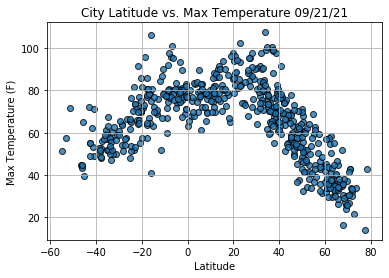

In [47]:
# Import time module
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,max_temps, edgecolor="black",linewidth=1,marker="o",alpha = .8,label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data-Fig1.png")

# Show plot
plt.show()

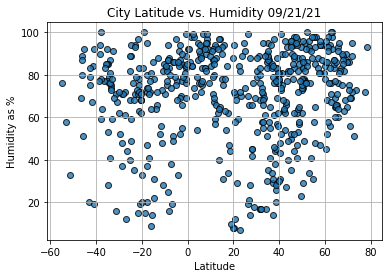

In [54]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,humidity, edgecolor="black",linewidth=1,marker="o",alpha = .8,label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity as %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data-Fig2-Humidity.png")

# Show plot
plt.show()

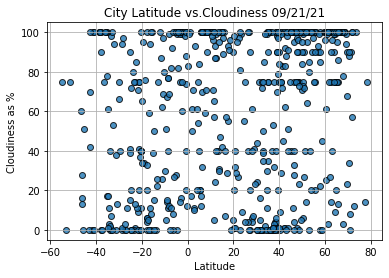

In [53]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,cloudiness, edgecolor="black",linewidth=1,marker="o",alpha = .8,label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs.Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness as %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data-Fig3-Cloudiness.png")

# Show plot
plt.show()

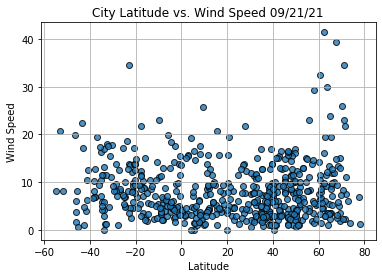

In [55]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,wind_speed, edgecolor="black",linewidth=1,marker="o",alpha = .8,label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data-Fig4-Wind Speed.png")

# Show plot
plt.show()